# Example 2: CPU and GPU performance tests
---

In [1]:
import matplotlib.pyplot as plt
import numpy             as np
%matplotlib notebook

In [2]:
executable_cpu = '/home/frederik/Dropbox/Astro/Magritte/bin/examples/example_2_cpu.exe'
executable_gpu = '/home/frederik/Dropbox/Astro/Magritte/bin/examples/example_2_gpu.exe'

In [3]:
test_model_cpu = '/home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_cpu/'
test_model_gpu = '/home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_gpu/'

In [4]:
test_model_cpu = '/home/frederik/Dropbox/GitHub/Magritte-code/Benchmarks/0_analytical_models/models/model_3_1D_density_distribution_test_cpu/'
test_model_gpu = '/home/frederik/Dropbox/GitHub/Magritte-code/Benchmarks/0_analytical_models/models/model_3_1D_density_distribution_test_gpu/'

---

Create model files.

In [48]:
%run /home/frederik/Dropbox/GitHub/Magritte-code/Benchmarks/1_van_Zadelhoff/models/model_1a_mini_cpu.ipynb
%run /home/frederik/Dropbox/GitHub/Magritte-code/Benchmarks/1_van_Zadelhoff/models/model_1a_mini_gpu.ipynb

ncells = 300
ncells = 300


---

Quick **memory check** with `valgrind` and `cuda-memcheck`.

In [33]:
! valgrind      $executable_cpu $test_model_cpu

==14680== Memcheck, a memory error detector
==14680== Copyright (C) 2002-2017, and GNU GPL'd, by Julian Seward et al.
==14680== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==14680== Command: /home/frederik/Dropbox/Astro/Magritte/bin/examples/example_2_cpu.exe /home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_cpu/
==14680== 
-------------------------------------------------
   Magritte   (CPU)                              
-------------------------------------------------
Performance tests for setup and solver functions.
(Only for CPU and single node use, i.e. no MPI.) 
-------------------------------------------------
Running model: /home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_cpu/
-------------------------------------------------
                                           
-------------------------------------------
  Reading Model...                         
-------------------------------

In [49]:
! cuda-memcheck $executable_gpu $test_model_gpu

========= CUDA-MEMCHECK
-------------------------------------------------
   Magritte   (GPU)
-------------------------------------------------
Performance tests for setup and solver functions.
( Only for GPU and single node use, i.e. no MPI )
-------------------------------------------------
Running model: /home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_gpu/
-------------------------------------------------
-------------------------------------------------
 Properties of the available GPU's :
-------------------------------------------------
-------------------------------------------------
Device Number                : 0
Device name                  : GeForce GTX 1050
Compute compatibility        : 6.1
Memory Clock Rate (KHz)      : 3504000
Memory Bus Width (bits)      : 128
Peak Memory Bandwidth (GB/s) : 112.128000
-------------------------------------------------
                                           
---------------------------------------

---

Run the models.

In [23]:
timing_cpu = %timeit -o ! $executable_cpu $test_model_cpu

-------------------------------------------------
   Magritte   (CPU)                              
-------------------------------------------------
Performance tests for setup and solver functions.
(Only for CPU and single node use, i.e. no MPI.) 
-------------------------------------------------
Running model: /home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_cpu/
-------------------------------------------------
                                           
-------------------------------------------
  Reading Model...                         
-------------------------------------------
 model file = /home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_cpu/
-------------------------------------------
Reading geometry
Reading cells
Reading rays
Reading boundary
Reading thermodynamics
Reading temperature
Reading turbulence
Reading chemistry
Reading species
Reading lines
Reading lineProducingSpecies
Reading linedata
Readin

In [19]:
timing_gpu = %timeit -o ! $executable_gpu $test_model_gpu

-------------------------------------------------
   Magritte   (GPU)
-------------------------------------------------
Performance tests for setup and solver functions.
( Only for GPU and single node use, i.e. no MPI )
-------------------------------------------------
Running model: /home/frederik/Magritte_all/Models/Benchmarks/1_van_Zadelhoff/model_problem_1a_mini_gpu/
-------------------------------------------------
-------------------------------------------------
 Properties of the available GPU's :
-------------------------------------------------
-------------------------------------------------
Device Number                : 0
Device name                  : GeForce GTX 1050
Compute compatibility        : 6.1
Memory Clock Rate (KHz)      : 3504000
Memory Bus Width (bits)      : 128
Peak Memory Bandwidth (GB/s) : 112.128000
-------------------------------------------------
                                           
-------------------------------------------
  Reading Model... 

In [5]:
result_J_cpu = np.loadtxt(f'{test_model_cpu}Radiation/J.txt')
result_J_gpu = np.loadtxt(f'{test_model_gpu}Radiation/J.txt')

In [21]:
timing.average

0.276014686714916

In [6]:
result_J_cpu

array([[2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        2.08703502e-150, 8.01549873e-155, 2.32909881e-159],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        2.08703502e-150, 8.01549873e-155, 2.32909881e-159],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        2.08703502e-150, 8.01549873e-155, 2.32909881e-159],
       ...,
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        2.08703502e-150, 8.01549873e-155, 2.32909881e-159],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        2.08703502e-150, 8.01549873e-155, 2.32909881e-159],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        2.08703502e-150, 8.01549873e-155, 2.32909881e-159]])

In [7]:
result_J_gpu

array([[2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        5.30098753e-157, 0.00000000e+000, 0.00000000e+000],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        5.30098753e-157, 0.00000000e+000, 0.00000000e+000],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        5.30098753e-157, 0.00000000e+000, 0.00000000e+000],
       ...,
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        5.30098753e-157, 0.00000000e+000, 0.00000000e+000],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        5.30098753e-157, 0.00000000e+000, 0.00000000e+000],
       [2.93413356e-006, 2.72365687e-006, 2.52319950e-006, ...,
        5.30098753e-157, 0.00000000e+000, 0.00000000e+000]])

In [8]:
relative_difference = 2.0 * np.abs(result_J_cpu - result_J_gpu) / (result_J_cpu + result_J_gpu)

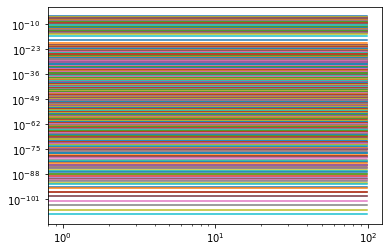

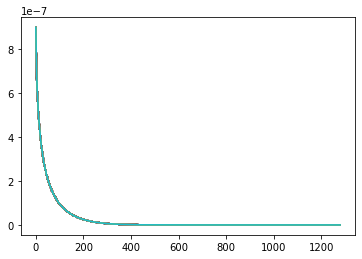

In [15]:
plt.loglog(result_J_gpu)
plt.show()
plt.plot(result_J_gpu.transpose())
plt.show()

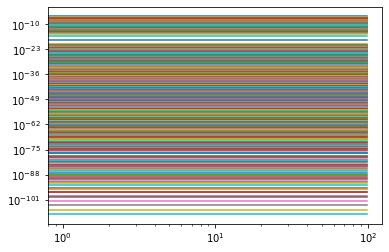

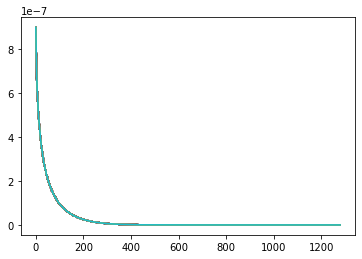

In [16]:
plt.loglog(result_J_cpu)
plt.show()
plt.plot(result_J_cpu.transpose())
plt.show()

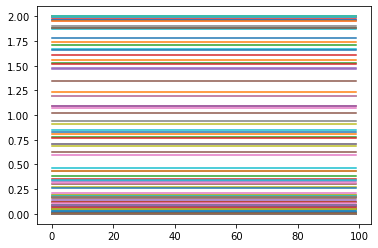

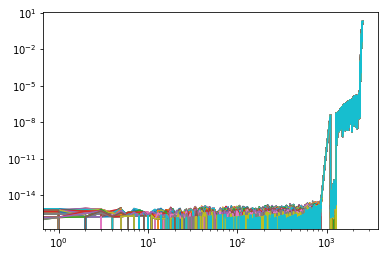

In [10]:
plt.plot(relative_difference)
plt.show()
plt.loglog(relative_difference.transpose())
plt.show()

In [13]:
result_J_gpu

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [12]:
result_J_cpu

array([[3.77283007e-18, 3.77282842e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282842e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282842e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       ...,
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18]])

In [14]:
result_J_gpu

array([[3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       ...,
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18],
       [3.77283007e-18, 3.77282843e-18, 3.77282705e-18, ...,
        3.77280032e-18, 3.77279895e-18, 3.77279730e-18]])